<a href="https://colab.research.google.com/github/jobabyyy/atlas-machine_learning/blob/main/policy_gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/usr/bin/env python3
"""
Policy Gradients:
Task 0: Simple Policy Function.
"""


import numpy as np


def policy(matrix, weight):
  """
  Function that computes to policy
  with a weight of a matrix.

  Returns: Policy Matrix
  """
  # checking if inputs are numpy arrays
  matrix = np.array(matrix)
  weight = np.array(weight)

  # dot product
  policy = np.dot(matrix, weight)
  # apply softmax function
  policy = np.exp(policy) / np.sum(np.exp(policy))

  return policy


# testing w/ example usage:
if __name__ == "__main__":

  import numpy as np


  weight = np.ndarray((4, 2), buffer=np.array([
      [4.17022005e-01, 7.20324493e-01],
      [1.14374817e-04, 3.02332573e-01],
      [1.46755891e-01, 9.23385948e-02],
      [1.86260211e-01, 3.45560727e-01]
      ]))
  state = np.ndarray((1, 4), buffer=np.array([
      [-0.04428214,  0.01636746,  0.01196594, -0.03095031]
      ]))

  res = policy(state, weight)
  print(res)

[[0.50351642 0.49648358]]


In [16]:
#!/usr/bin/env python3
"""
Policy Gradients:
Task 1: Compute the Monte-Carlo Policy Gradient
"""

import numpy as np
import gym

def policy(matrix, weight):
  """
  Function that computes to policy
  with a weight of a matrix.

  Returns: Policy Matrix
  """
  # checking if inputs are numpy arrays
  matrix = np.array(matrix)
  weight = np.array(weight)

  # dot product
  policy = np.dot(matrix, weight)

  # apply softmax function
  policy = np.exp(policy) / np.sum(np.exp(policy))

  return policy


def policy_gradient(state, weight):
  """
  Function that computes the Monte-Carlo policy.

  state: matrix representing the current observation
         of the environment.
  weight: matrix of random weight.

  Return: action and gradient (in that order).
  """
  # compute the policy.
  z = state.dot(weight)

  # compute softmax scores.
  scores = np.exp(z)
  action_probs = scores / np.sum(scores)

  # convert action probs into 1-D array.
  action_probs = np.squeeze(np.asarray(action_probs))

  # sample action based on probability.
  action = np.random.choice(len(action_probs), p=action_probs)

  # compute the gradient of log probability
  dsoftmax = action_probs.copy()
  dsoftmax[action] -= 1
  dlog = dsoftmax / action_probs

  # compute gradient w respect to state.
  gradient = state[None, :].T.dot(dsoftmax[None, ...])

  return action, gradient


# testing using usage example:
import gym
if __name__ == "__main__":

  env = gym.make('CartPole-v1')
  np.random.seed(1)

  weight = np.random.rand(4, 2)
  state = env.reset()[None,:]
  print(weight)
  print(state)

  action, grad = policy_gradient(state, weight)
  print(action)
  print(grad)

  env.close()


[[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01]]
[[-0.02517247 -0.02232902  0.01386825 -0.03413075]]
0
[[[ 0.01245676 -0.01245676]]

 [[ 0.01104966 -0.01104966]]

 [[-0.0068628   0.0068628 ]]

 [[ 0.01688982 -0.01688982]]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/num

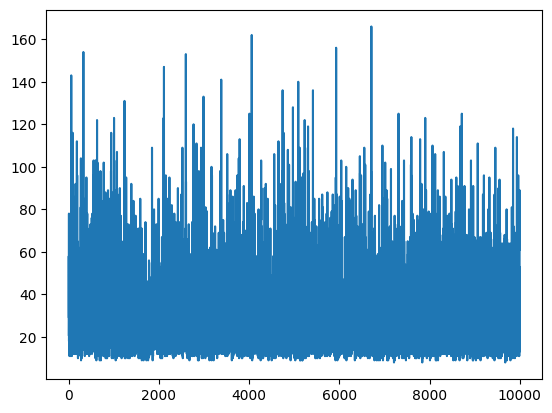

In [32]:
#!/usr/bin/env python3
"""
Policy Gradient:
Task 2: Implement the training.
"""

import numpy as np
import gym
import matplotlib.pyplot as plt


def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()


def policy(weights, observation):
    z = observation.dot(weights)
    prob = softmax(z)
    return prob

def policy_gradient(state, weight):
    """
    Function that computes the Monte-Carlo policy.

    state: matrix representing the current observation
          of the environment.
    weight: matrix of random weight.

    Return: action and gradient (in that order).
    """
    # compute the policy.
    z = state.dot(weight)

    # compute softmax scores.
    scores = np.exp(z)
    action_probs = scores / np.sum(scores)

    # convert action probs into 1-D array.
    action_probs = np.squeeze(np.asarray(action_probs))

    # sample action based on probability.
    action = np.random.choice(len(action_probs), p=action_probs)

    # compute the gradient of log probability
    dsoftmax = action_probs.copy()
    dsoftmax[action] -= 1
    dlog = dsoftmax / action_probs

    # compute gradient w respect to state.
    gradient = state[None, ...].T.dot(dsoftmax[None, ...])

    return action, gradient

def train(env, nb_episodes, alpha=0.000045, gamma=0.98):
    """
    Function that implements a full training.

    env: initialized environment
    nb_episodes: number of episodes used for training
    alpha: learning rate
    gamma: discount value

    Return: all values of the score -
            (sum of all rewards during 1 loop)
    """
    np.random.seed(0)

    # Initialize weight matrix
    weight = np.random.rand(env.observation_space.shape[0], env.action_space.n)

    # Initialize score tracking
    scores = []

    # Loop over episodes
    for episode in range(nb_episodes):
        # Reset environment and score
        state = env.reset()
        gradient = []
        rewards = []
        episode_score = 0
        states = []
        actions = []
        probs = []

        while True:
            prob = policy(weight, state)
            # Compute action and gradient
            action = np.random.choice(len(prob), p=prob)

            # Take action in the environment
            state, reward, done, _ = env.step(action)

            # Store gradient and reward
            states.append(state)

            actions.append(action)

            probs.append(prob)


            # Update episode score
            episode_score += reward

            if done:
                break

        discounted_rewards = np.array([sum([r * (gamma ** t) for t, r in enumerate(rewards[i:])]) for i in range(len(rewards))])
        discounted_rewards = np.mean(discounted_rewards)
        discounted_rewards = np.std(discounted_rewards)

        # update the weights using the accumlated grads and rewards
        for i in range(len(gradient)):
          learning_rate = (alpha * gradient[i])
          discount_rate = sum(gamma ** rewards[i:] * rewards[i:])
          weight += learning_rate * discount_rate


        # Print episode number and score
        print(f"Episode: {episode + 1}, Score: {episode_score}", end="\r", flush=False)

        # Store episode score
        scores.append(episode_score)

    return scores


# Testing using usage example:
if __name__ == "__main__":
    env = gym.make('CartPole-v1')

    scores = train(env, 10000)

    plt.plot(np.arange(len(scores)), scores)
    plt.show()
    env.close()


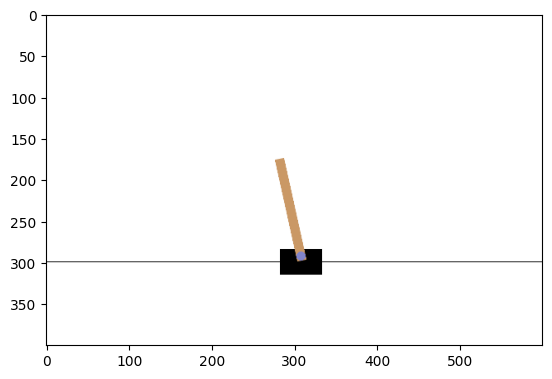

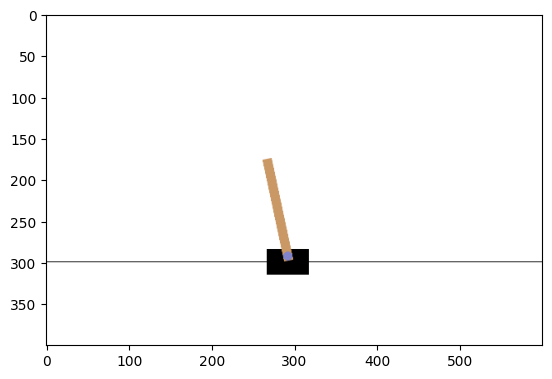

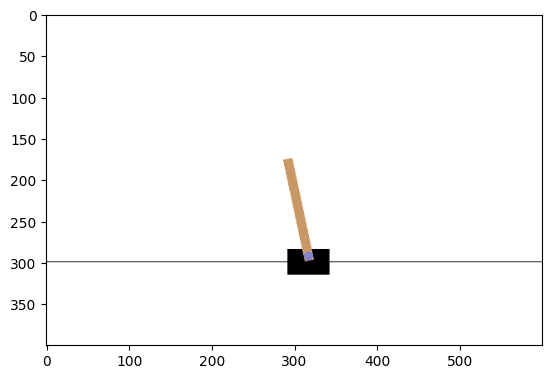

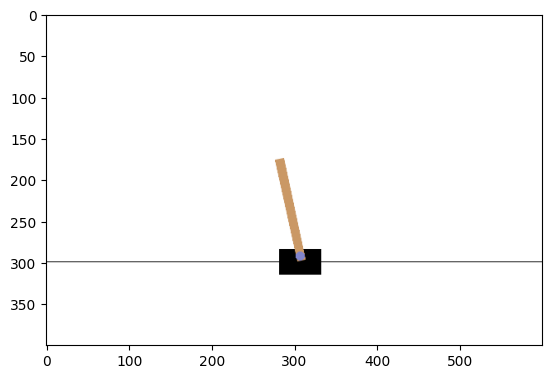

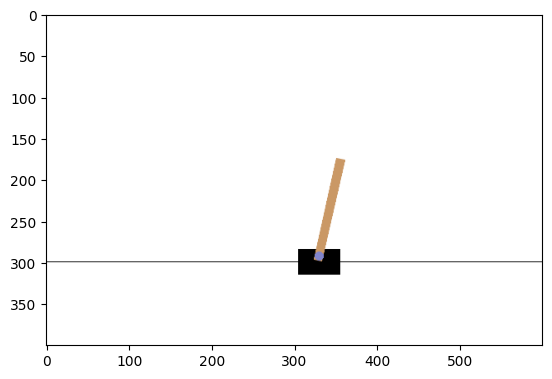

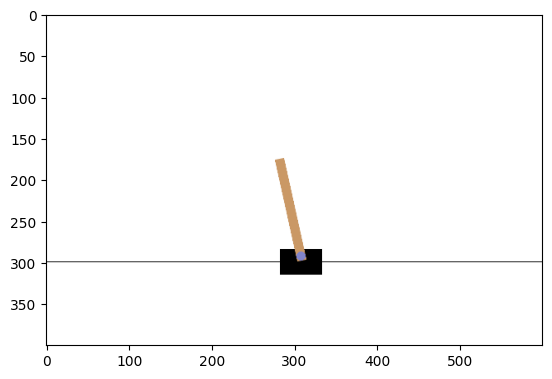

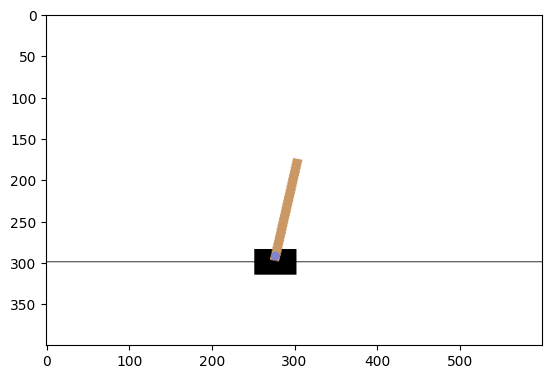

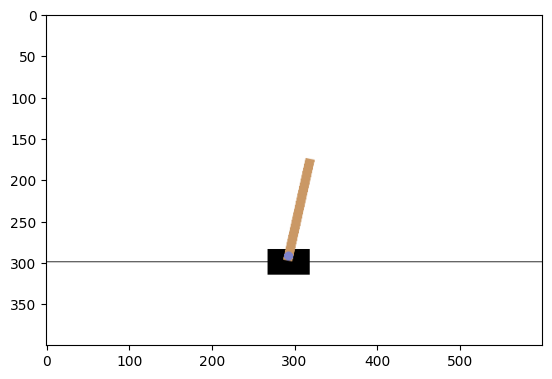

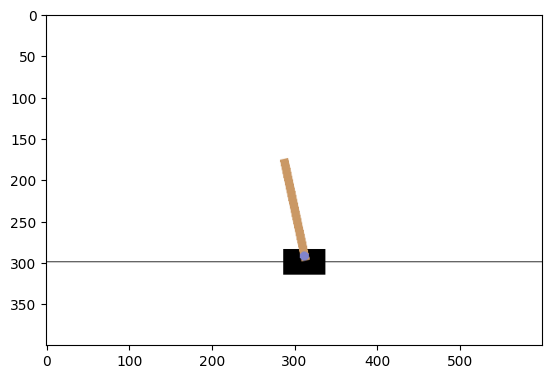

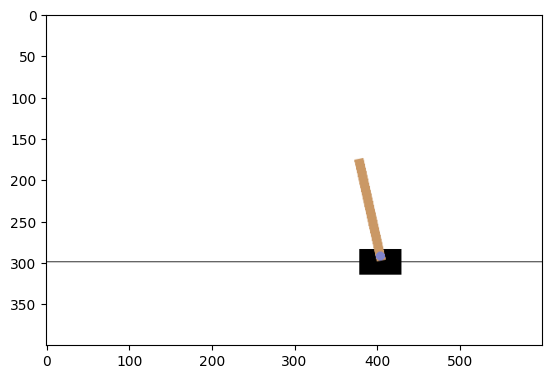

In [42]:
#!/usr/bin/env python3
"""
Policy Gradients:
Task 3: Animate Iteration
"""

import numpy as np
import gym
import matplotlib.pyplot as plt

def train(env, nb_episodes, alpha=0.000045, gamma=0.98, show_result=False):
    """
    Function that implements a full training.

    env: initialized environment
    nb_episodes: number of episodes used for training
    alpha: learning rate
    gamma: discount value

    Return: all values of the score -
            (sum of all rewards during 1 loop)
    """
    np.random.seed(0)

    # Initialize weight matrix
    weight = np.random.rand(env.observation_space.shape[0], env.action_space.n)

    # Initialize score tracking
    scores = []

    # Loop over episodes
    for episode in range(nb_episodes):
        # Reset environment and score
        state = env.reset()
        gradient = []
        rewards = []
        episode_score = 0
        states = []
        actions = []
        probs = []

        while True:
            prob = policy(weight, state)
            # Compute action and gradient
            action = np.random.choice(len(prob), p=prob)

            # Take action in the environment
            state, reward, done, _ = env.step(action)

            # Store gradient and reward
            states.append(state)

            actions.append(action)

            probs.append(prob)


            # Update episode score
            episode_score += reward

            if done:
                break

        discounted_rewards = np.array([sum([r * (gamma ** t) for t, r in enumerate(rewards[i:])]) for i in range(len(rewards))])
        discounted_rewards = np.mean(discounted_rewards)
        discounted_rewards = np.std(discounted_rewards)

        # update the weights using the accumlated grads and rewards
        for i in range(len(gradient)):
          learning_rate = (alpha * gradient[i])
          discount_rate = sum(gamma ** rewards[i:] * rewards[i:])
          weight += learning_rate * discount_rate


        # Print episode number and score
        print(f"Episode: {episode + 1}, Score: {episode_score}", end="\r", flush=False)

        # Store episode score
        scores.append(episode_score)

        if show_result and episode % 1000 == 0:
            img = env.render(mode='rgb_array')
            plt.imshow(img)
            plt.show()

    return scores

if __name__ == "__main__":
  import gym


  env = gym.make('CartPole-v1')

  scores = train(env, 10000, 0.000045, 0.98, True)

  env.close()